### Read PDF

In [47]:
from PyPDF2 import PdfReader 
from tqdm import tqdm

# read PDF
pdf_file = PdfReader("GNN_book.pdf")
print("Total pages: ", len(pdf_file.pages))

text = ""
for page_num in tqdm(range(len(pdf_file.pages))):
    pdf_reader = pdf_file.pages[page_num]
    text += pdf_reader.extract_text()

Total pages:  701


100%|██████████| 701/701 [00:07<00:00, 94.01it/s] 


In [48]:
# save
text = text.replace("-\n", "") # fix line breaks

with open("book.txt", "w", encoding="utf-8") as file:
    file.write(text)

### Preprocessing

In [49]:
# read
text = open("book.txt", "r").read()

#### Using nltk

In [50]:
# convert text file to sentences

list_sentences = []
for sentences in text.split("."):
    list_sentences.append(sentences)

print(len(list_sentences))
list_sentences[:5]

27152


['Graph Neural \nNetworks\nFoundations, \nFrontiers, \nand ApplicationsLingfei Wu · Peng Cui \nJian Pei · Liang Zhao Eds',
 ' Graph Neural Networks: Foundations,  \nFrontiers, and Applications  123Lingfei  Wu • Peng  Cui • Jian Pei • Liang  Zhao  \nEditors\n \nGraph Neural Networks: \nFoundations, Frontiers, \nand ApplicationsEditors \nLingfei Wu \nJD Silicon Valley Research Center \nMountain View , CA, USA  \n Peng Cui \nTsinghua University \nBeijing , China \n \nJian Pei \nSimon Fraser University\nBurnaby , Canada \n Liang Zhao \nEmory University \nAtlanta , USA  \n \nISBN 978 -981-16-6053-5  ISBN 978-981-16-6054-2 (eBook)  \nhttps://doi',
 'org/10',
 '1007/978 -981-16-6054-2  \n \n© The Editor(s) (if applicable) and The Author(s), under exclusive license to Springer Nature Singapore \nPte Ltd',
 ' 2022\nThis work is subject to copyright']

In [51]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

nltk.download("punkt")
# De stopwords
nltk.download("stopwords")
# Y también la wordnet
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /home/win7/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/win7/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/win7/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
# tokenizer
tokens_frequency = FreqDist(word_tokenize(" ".join(list_sentences)))

# most common
tokens_frequency.most_common(10)

[(',', 24102),
 ('the', 13622),
 (')', 11384),
 ('(', 11281),
 ('of', 6925),
 ('and', 5836),
 ('to', 4906),
 ('a', 4443),
 ('in', 3481),
 ('graph', 3239)]

In [53]:
# summary
print("Number of tokens: {}".format(tokens_frequency.N()))
print("Vocabulary size: {}".format(len(tokens_frequency)))

Number of tokens: 335514
Vocabulary size: 24158


In [54]:
def text_preprocess(text: str) -> str:
    stop_words = stopwords.words("english")
    stop_words = stop_words + ["et", "al"] # add this word
    
    tokens = [token for token in word_tokenize(text.lower()) if (token.isalpha() and (token not in stop_words))]
    return " ".join(tokens)

In [55]:
# cleaning text
list_sentences_new1 = []
for sentence in list_sentences:
    aux = text_preprocess(sentence)
    if len(aux) > 0:
        list_sentences_new1.append(text_preprocess(sentence))
list_sentences_new1

['graph neural networks foundations frontiers applicationslingfei wu peng cui jian pei liang zhao eds',
 'graph neural networks foundations frontiers applications wu peng cui jian pei liang zhao editors graph neural networks foundations frontiers applicationseditors lingfei wu jd silicon valley research center mountain view ca usa peng cui tsinghua university beijing china jian pei simon fraser university burnaby canada liang zhao emory university atlanta usa isbn isbn ebook https',
 'editor applicable author exclusive license springer nature singapore pte ltd',
 'work subject copyright',
 'rights solely exclusively licensed publisher whether whole part material concerned specifically rights reprinting reuse illustrations recitation broadcasting reproduction microfilms physical way transmission information storage retrieval electronic adaptation computer software similar dissimilar methodology known hereafter developed',
 'use general descriptive names registered names trademarks servi

In [56]:
# tokenizer
tokens_frequency = FreqDist(word_tokenize(" ".join(list_sentences_new1)))

# most common
tokens_frequency.most_common(10)

[('graph', 4201),
 ('node', 1738),
 ('learning', 1665),
 ('networks', 1307),
 ('neural', 1280),
 ('g', 1089),
 ('nodes', 1036),
 ('data', 933),
 ('e', 892),
 ('graphs', 872)]

In [57]:
# summary
print("Number of tokens: {}".format(tokens_frequency.N()))
print("Vocabulary size: {}".format(len(tokens_frequency)))

Number of tokens: 158717
Vocabulary size: 12837


#### Using Gensim

In [58]:
from gensim.utils import simple_preprocess

list_sentences_new2 = []
for sentence in text.split("."):
    # the simple_preprocess function returns a list of each sentence
    aux = simple_preprocess(sentence, deacc=True)
    if len(aux) > 0:
        list_sentences_new2.append(" ".join(aux))

list_sentences_new2

['graph neural networks foundations frontiers and wu peng cui jian pei liang zhao eds',
 'graph neural networks foundations frontiers and applications lingfei wu peng cui jian pei liang zhao editors graph neural networks foundations frontiers and lingfei wu jd silicon valley research center mountain view ca usa peng cui tsinghua university beijing china jian pei simon fraser university burnaby canada liang zhao emory university atlanta usa isbn isbn ebook https doi',
 'org',
 'the editor if applicable and the author under exclusive license to springer nature singapore pte ltd',
 'this work is subject to copyright',
 'all rights are solely and exclusively licensed by the publisher whether the whole or part of the material is concerned specifically the rights of reprinting reuse of illustrations recitation broadcasting reproduction on microfilms or in any other physical way and transmission or information storage and retrieval electronic adaptation computer software or by similar or diss

In [59]:
# tokenizer
tokens_frequency = FreqDist(word_tokenize(" ".join(list_sentences_new2)))

# most common
tokens_frequency.most_common(10)

[('the', 15074),
 ('of', 6986),
 ('and', 5925),
 ('to', 5284),
 ('in', 5079),
 ('graph', 4603),
 ('is', 3201),
 ('for', 2846),
 ('al', 2631),
 ('et', 2620)]

### Word embeddings

In [60]:
from gensim.models import Word2Vec

In [61]:
# create sentences
sentences = [word_tokenize(doc) for doc in list_sentences_new1]
print(len(sentences))
sentences[:2]

14636


[['graph',
  'neural',
  'networks',
  'foundations',
  'frontiers',
  'applicationslingfei',
  'wu',
  'peng',
  'cui',
  'jian',
  'pei',
  'liang',
  'zhao',
  'eds'],
 ['graph',
  'neural',
  'networks',
  'foundations',
  'frontiers',
  'applications',
  'wu',
  'peng',
  'cui',
  'jian',
  'pei',
  'liang',
  'zhao',
  'editors',
  'graph',
  'neural',
  'networks',
  'foundations',
  'frontiers',
  'applicationseditors',
  'lingfei',
  'wu',
  'jd',
  'silicon',
  'valley',
  'research',
  'center',
  'mountain',
  'view',
  'ca',
  'usa',
  'peng',
  'cui',
  'tsinghua',
  'university',
  'beijing',
  'china',
  'jian',
  'pei',
  'simon',
  'fraser',
  'university',
  'burnaby',
  'canada',
  'liang',
  'zhao',
  'emory',
  'university',
  'atlanta',
  'usa',
  'isbn',
  'isbn',
  'ebook',
  'https']]

#### Train

In [62]:
import time
import numpy as np
import pandas as pd
import os

start_time = time.time()
model = Word2Vec(
    sentences=sentences,
    vector_size=64,
    window=5,
    workers=os.cpu_count(),
    sg=0, # 0: skip-gram; 1: CBOW
    hs=1, # 0: negative sampling; 1: hierarchical softmax
    seed=42,
    epochs=100
)
elapsed = time.time() - start_time
print("Runtime: {}sec.".format(elapsed))

Runtime: 8.526049613952637sec.


In [63]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_most_similar(target, topn=10):
    # find the most similar words and their vectors
    similar_words = [word for word, _ in model.wv.most_similar(target, topn=topn)]
    similar_words.append(target)
    vectors = [model.wv[word] for word in similar_words]
    colors = ["#4285F4"] * (len(similar_words) - 1) + ["#DB4437"]

    # reduce dimensionality to 2D
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)

    # plot the embeddings
    plt.figure(figsize=(8, 6))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=colors)

    # annotate each point with the word
    for i, word in enumerate(similar_words):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

    plt.title("Most Similar Words to {}".format(target))
    plt.show()

#### Similarity

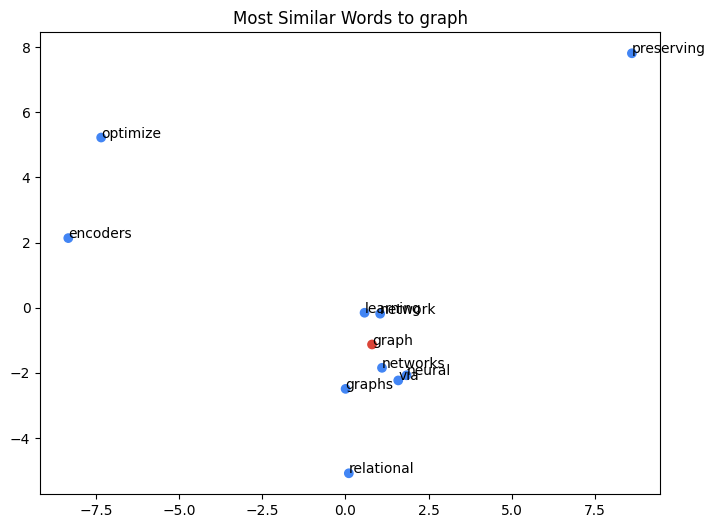

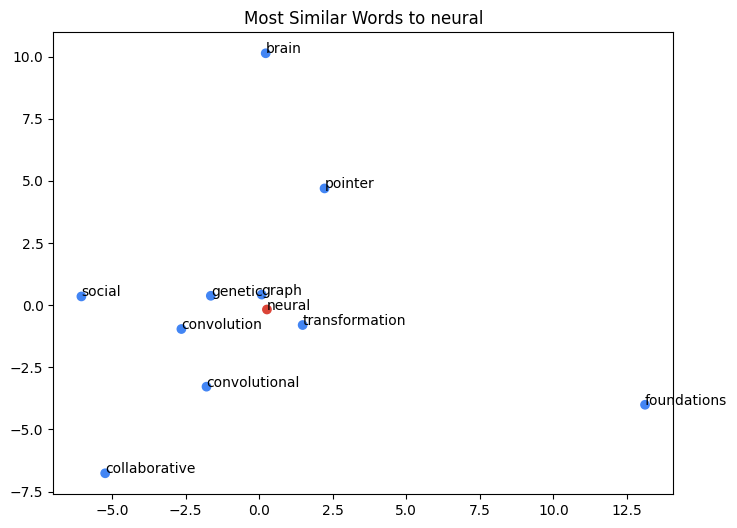

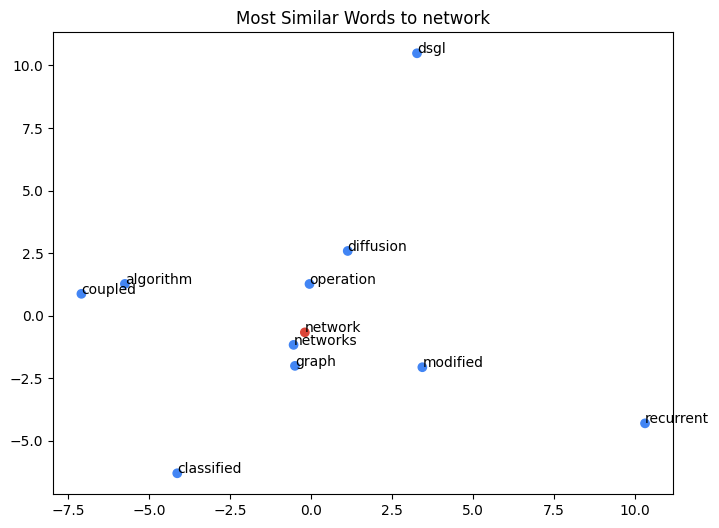

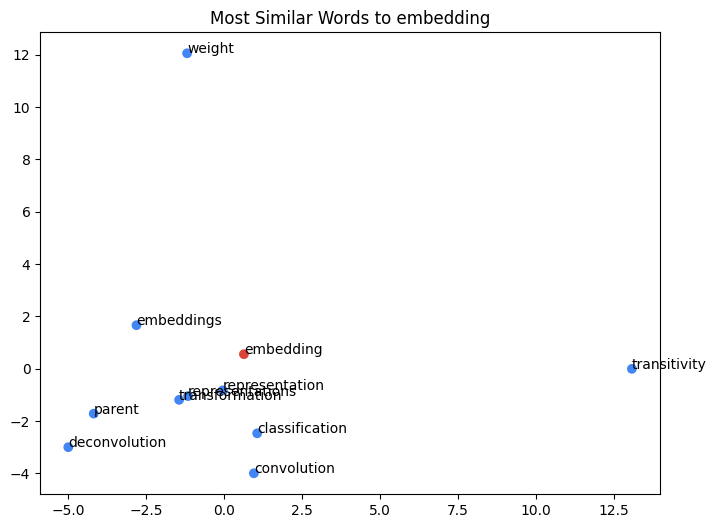

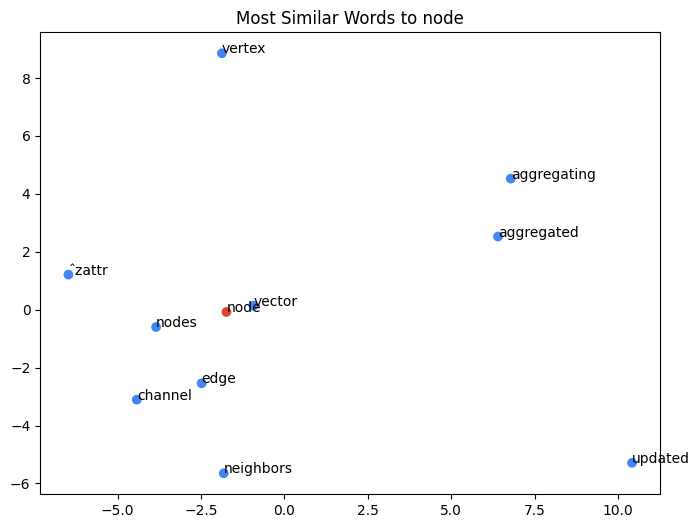

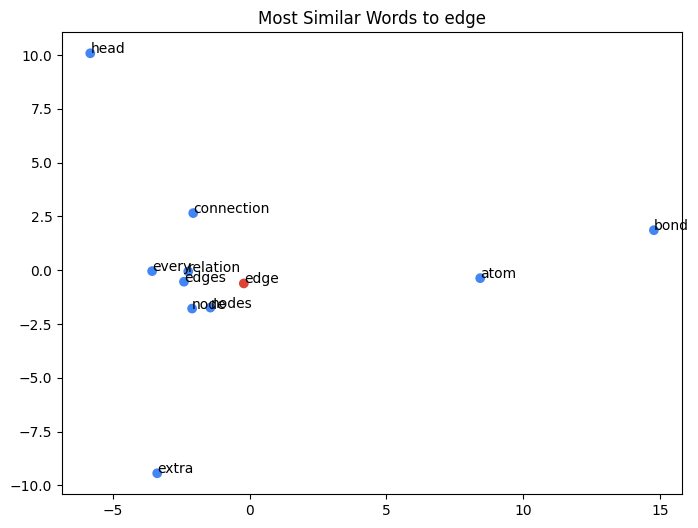

In [64]:
targets = ["graph", "neural", "network", "embedding", "node", "edge"] # change

for target in targets:
    plot_most_similar(target, topn=10)